## Simple Linear Regression

In [1]:
import numpy as np

In [2]:
class Linear_regression:
    def __init__(self,learning_rate=0.01,n_iter=1000):
        #reference to the current instance of the class 
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        
        #we will declare this value during fit
        self.weight = None
        self.bias = None
        
        #creating history variable to store accuracy
        self.history = []
        
    def fit(self,X,y):
        #Fetching number of samples and features from the data
        n_samples, n_features = X.shape
        
        #Initiation weight and bias with zero
        self.weight = np.zeros(shape=(n_features))
        self.bias = 0
        
        
        
        #Gradien Descent 
        for _ in range(self.n_iter):
            #First predict the y using initial weight and bias
            y_predicted = np.dot(X,self.weight) + self.bias
            
            ##Adding error in history
            self.history.append(self.rmse(y_predicted,y))
            
            #getting gradient             
            dw = (1/n_samples) * np.dot(X.T,(y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            #updating values using gradient 
            self.weight = self.weight - (self.learning_rate)*dw
            self.bias = self.bias - (self.learning_rate)*db
            
        return self.history
            
    def predict(self,X):
        y_predicted = np.dot(X,self.weight) + self.bias
        
        return y_predicted 
    def rmse(self,predictions,targets):
         return np.sqrt(((predictions - targets) ** 2).mean())
        
    def _intercept(self):
        return self.bias
    
    def _coef(self):
        return self.weight

In [3]:
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_regression(n_samples=1000, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

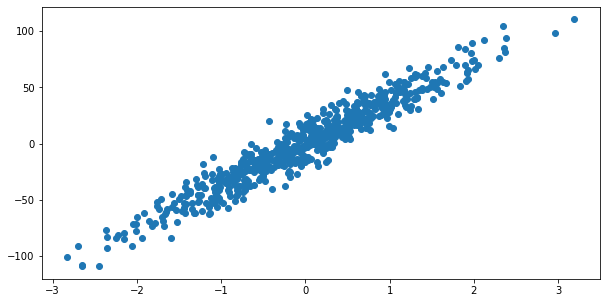

In [6]:
#Regression Dataset
rcParams['figure.figsize'] = 10,5
plt.scatter(X_train,y_train)

In [7]:
model = Linear_regression(learning_rate=0.01)
hist= model.fit(X_train, y_train)
y_predict = model.predict(X_test)
w,b = model._coef(),model._intercept()
print("Weight: {}\nBias: {:.2f}".format(w,b))

Weight: [37.07022264]
Bias: 0.58


In [8]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9345074810601093

In [9]:
model.rmse(y_test,y_predict)

9.496494278094813

Text(0, 0.5, 'Root mean square error')

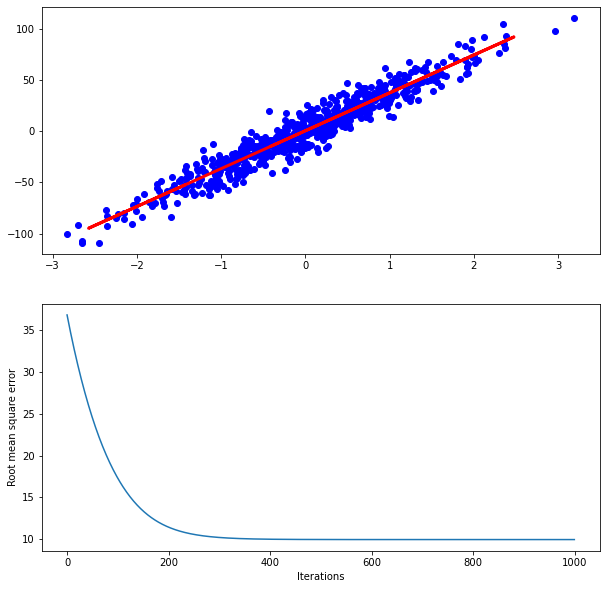

In [10]:
rcParams['figure.figsize'] = 10,10
fig, ax = plt.subplots(2,1)
ax[0].scatter(X_train, y_train,  color='blue')
ax[0].plot(X_test, y_predict, color='red', linewidth=3)
ax[1].set_xlabel("Independent variable X")
ax[1].set_ylabel("Dependent variable X")


ax[1].plot(hist)
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Root mean square error")

## Multiple Linear Regression

In [11]:
X, y = make_regression(n_samples=100, n_features=4, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
model = Linear_regression(learning_rate=0.01)
hist= model.fit(X_train, y_train)
y_predict = model.predict(X_test)
w,b = model._coef(),model._intercept()
print("Weight: {}\nBias: {:.2f}".format(w,b))

Weight: [ 2.15320658 76.49152836 54.46695571 49.7374328 ]
Bias: -2.23


In [13]:
r2_score(y_test,y_predict)

0.9928492587403481

<AxesSubplot:>

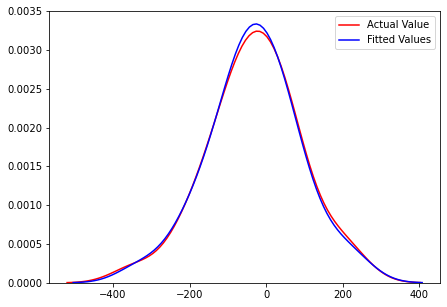

In [14]:
import seaborn as sns
rcParams['figure.figsize'] = 7,5
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)